# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from curtis_api_keys import weather_api_key
from curtis_api_keys import nrel_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (20, 50)
lng_range = (-70, -130)


## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


1419

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        returned_city.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("")
        missing+=1
        print(f'City {city} not found. Skipping, total not found = {missing}')
    if count+missing >=1000:
        break
    
#     time.sleep(2)
      

Processing Recored 1 of 1419 | mariel
Processing Recored 2 of 1419 | assiniboia
Processing Recored 3 of 1419 | cuauhtemoc
Processing Recored 4 of 1419 | ukiah
Processing Recored 5 of 1419 | todos santos
Processing Recored 6 of 1419 | bend
Processing Recored 7 of 1419 | pacific grove
Processing Recored 8 of 1419 | port huron
Processing Recored 9 of 1419 | lompoc
Processing Recored 10 of 1419 | lewistown
Processing Recored 11 of 1419 | matamoros
Processing Recored 12 of 1419 | cabo san lucas
Processing Recored 13 of 1419 | miami lakes
Processing Recored 14 of 1419 | fortuna
Processing Recored 15 of 1419 | ucluelet
Processing Recored 16 of 1419 | ville-marie
Processing Recored 17 of 1419 | bahia honda
Processing Recored 18 of 1419 | galveston
Processing Recored 19 of 1419 | forrest city
Processing Recored 20 of 1419 | sonoita
Processing Recored 21 of 1419 | guerrero negro
Processing Recored 22 of 1419 | big spring
Processing Recored 23 of 1419 | rapid valley
Processing Recored 24 of 1419 

Processing Recored 189 of 1419 | pacifica
Processing Recored 190 of 1419 | tesistan
Processing Recored 191 of 1419 | clovis
Processing Recored 192 of 1419 | maneadero
Processing Recored 193 of 1419 | ensley
Processing Recored 194 of 1419 | hastings
Processing Recored 195 of 1419 | fortuna foothills
Processing Recored 196 of 1419 | thunder bay
Processing Recored 197 of 1419 | sain alto
Processing Recored 198 of 1419 | enumclaw
Processing Recored 199 of 1419 | hoquiam
Processing Recored 200 of 1419 | simcoe
Processing Recored 201 of 1419 | selma
Processing Recored 202 of 1419 | lebanon
Processing Recored 203 of 1419 | fallon
Processing Recored 204 of 1419 | urbana
Processing Recored 205 of 1419 | lethbridge
Processing Recored 206 of 1419 | gonzalez
Processing Recored 207 of 1419 | ruidoso
Processing Recored 208 of 1419 | magalia
Processing Recored 209 of 1419 | rosarito
Processing Recored 210 of 1419 | grants pass
Processing Recored 211 of 1419 | miles city
Processing Recored 212 of 1419

Processing Recored 380 of 1419 | chickasha
Processing Recored 381 of 1419 | muskogee
Processing Recored 382 of 1419 | groton
Processing Recored 383 of 1419 | jimenez
Processing Recored 384 of 1419 | nuevo progreso
Processing Recored 385 of 1419 | san felipe
Processing Recored 386 of 1419 | carthage
Processing Recored 387 of 1419 | cape canaveral
Processing Recored 388 of 1419 | billings
Processing Recored 389 of 1419 | marion
Processing Recored 390 of 1419 | guadalupe victoria
Processing Recored 391 of 1419 | polson
Processing Recored 392 of 1419 | rockport
Processing Recored 393 of 1419 | colonial heights
Processing Recored 394 of 1419 | beaupre
Processing Recored 395 of 1419 | camden
Processing Recored 396 of 1419 | jesup
Processing Recored 397 of 1419 | kerman
Processing Recored 398 of 1419 | castanos
Processing Recored 399 of 1419 | lexington park
Processing Recored 400 of 1419 | kearney
Processing Recored 401 of 1419 | chillicothe
Processing Recored 402 of 1419 | moa
Processing Re

Processing Recored 569 of 1419 | plymouth
Processing Recored 570 of 1419 | maple creek
Processing Recored 571 of 1419 | williston
Processing Recored 572 of 1419 | waverly
Processing Recored 573 of 1419 | dryden
Processing Recored 574 of 1419 | statesboro
Processing Recored 575 of 1419 | williamsport
Processing Recored 576 of 1419 | tarpon springs
Processing Recored 577 of 1419 | la sarre
Processing Recored 578 of 1419 | vincennes
Processing Recored 579 of 1419 | corning
Processing Recored 580 of 1419 | glencoe
Processing Recored 581 of 1419 | placerville
Processing Recored 582 of 1419 | bellevue
Processing Recored 583 of 1419 | sun city west
Processing Recored 584 of 1419 | puerto padre
Processing Recored 585 of 1419 | lewiston
Processing Recored 586 of 1419 | charlottesville
Processing Recored 587 of 1419 | gardner
Processing Recored 588 of 1419 | alice town
Processing Recored 589 of 1419 | lake havasu city
Processing Recored 590 of 1419 | cedartown
Processing Recored 591 of 1419 | eg

Processing Recored 758 of 1419 | cape girardeau
Processing Recored 759 of 1419 | santa ana
Processing Recored 760 of 1419 | estevan
Processing Recored 761 of 1419 | huntsville
Processing Recored 762 of 1419 | nuevo laredo
Processing Recored 763 of 1419 | indianola
Processing Recored 764 of 1419 | bryan
Processing Recored 765 of 1419 | coatesville
Processing Recored 766 of 1419 | athens
Processing Recored 767 of 1419 | puga
Processing Recored 768 of 1419 | hopkinsville
Processing Recored 769 of 1419 | cadillac
Processing Recored 770 of 1419 | valley city
Processing Recored 771 of 1419 | canandaigua
Processing Recored 772 of 1419 | choix
Processing Recored 773 of 1419 | martin
Processing Recored 774 of 1419 | sutton
Processing Recored 775 of 1419 | fort wayne
Processing Recored 776 of 1419 | kennewick
Processing Recored 777 of 1419 | moss point
Processing Recored 778 of 1419 | pueblo nuevo
Processing Recored 779 of 1419 | vertientes
Processing Recored 780 of 1419 | state college
Processi

Processing Recored 943 of 1419 | newton
Processing Recored 944 of 1419 | shelton
Processing Recored 945 of 1419 | worland
Processing Recored 946 of 1419 | russellville
Processing Recored 947 of 1419 | beecher
Processing Recored 948 of 1419 | puerto vallarta
Processing Recored 949 of 1419 | greer
Processing Recored 950 of 1419 | culpeper
Processing Recored 951 of 1419 | cumberland
Processing Recored 952 of 1419 | palm springs
Processing Recored 953 of 1419 | parsons
Processing Recored 954 of 1419 | rancho veloz
Processing Recored 955 of 1419 | cherry hill
Processing Recored 956 of 1419 | stuttgart
Processing Recored 957 of 1419 | east millcreek
Processing Recored 958 of 1419 | whitefish
Processing Recored 959 of 1419 | xicotencatl
Processing Recored 960 of 1419 | canby
Processing Recored 961 of 1419 | thurso
Processing Recored 962 of 1419 | lake city
Processing Recored 963 of 1419 | oildale
Processing Recored 964 of 1419 | austintown
Processing Recored 965 of 1419 | ures
Processing Reco

In [108]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data=weather_data.round(1)
weather_data.to_csv('output_data/Exported_weather_data.csv')

In [117]:
weather_data['Lat']=pd.to_numeric(weather_data['Lat'])
weather_data['Lng']=pd.to_numeric(weather_data['Lng'])
weather_data['Humidity']=pd.to_numeric(weather_data['Humidity'])
weather_data['Cloudiness']=pd.to_numeric(weather_data['Cloudiness'])
weather_data['Wind_Speed']=pd.to_numeric(weather_data['Wind_Speed'])
weather_data['Date']=pd.to_numeric(weather_data['Date'])
weather_data.describe()

,Lat,Lng,Humidity,Cloudiness,Wind_Speed,Date
count,989.000000,989.000000,989.000000,989.000000,989.000000,9.890000e+02
mean,35.282528,-84.899727,73.239636,30.116279,2.921001,1.596171e+09
std,12.783349,39.720319,22.886938,36.910352,1.870263,1.677307e+02
min,-41.530000,-127.420000,1.000000,0.000000,0.210000,1.596170e+09
25%,30.240000,-105.370000,64.000000,1.000000,1.500000,1.596171e+09
50%,37.340000,-90.390000,81.000000,3.000000,2.600000,1.596171e+09
75%,42.870000,-79.720000,88.000000,74.000000,3.600000,1.596171e+09
max,59.780000,173.280000,100.000000,100.000000,23.480000,1.596171e+09


In [81]:
##testing request
# url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"
# query_url = f"{url}api_key={nrel_key}&lat=40&lon=105"
# response = requests.get(query_url).json() 
# response

In [118]:
# Save config information.
url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"



#create blank lists for data
avg_dni_annual=[] 
avg_ghi_annual=[] 
avg_lat_tilt_annual=[] 
       
# lat=weather_data['Lat']
# lng=weather_data['Lng']

# Loop through the list of cities and perform a request for data on each based on lat/long
count=0
missing=0
for index, row in weather_data.iterrows():
    query_url = f"{url}api_key={nrel_key}&lat={row['Lat']}&lon={row['Lng']}"
#     query_url = f"{url}api_key={nrel_key}&lat={lat}&lon={lng}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        
        avg_dni_annual.append(response['outputs']['avg_dni']['annual'])
        avg_ghi_annual.append(response['outputs']['avg_dni']['annual'])
        avg_lat_tilt_annual.append(response['outputs']['avg_dni']['annual'])
        count+=1
        print(f"Processing Recored {count} of {len(cities)} | {row['City']}") 
    except:
        avg_dni_annual.append("")
        avg_ghi_annual.append("")
        avg_lat_tilt_annual.append("")
        missing+=1
        print(f"Solar data not found for {row['City']}. Skipping, total not found = {missing}")
    if count+missing >=1000:
        break

    time.sleep(2)

Solar data not found for Mariel. Skipping, total not found = 1
Solar data not found for Assiniboia. Skipping, total not found = 2
Solar data not found for Cuauhtémoc. Skipping, total not found = 3
Processing Recored 1 of 1419 | Ukiah
Solar data not found for Todos Santos. Skipping, total not found = 4
Processing Recored 2 of 1419 | Bend
Processing Recored 3 of 1419 | Pacific Grove
Processing Recored 4 of 1419 | Port Huron
Processing Recored 5 of 1419 | Lompoc
Processing Recored 6 of 1419 | Lewistown
Solar data not found for Matamoros. Skipping, total not found = 5
Solar data not found for Cabo San Lucas. Skipping, total not found = 6
Processing Recored 7 of 1419 | Miami Lakes
Processing Recored 8 of 1419 | Fortuna
Solar data not found for Ucluelet. Skipping, total not found = 7
Solar data not found for Ville-Marie. Skipping, total not found = 8
Solar data not found for Bahía Honda. Skipping, total not found = 9
Processing Recored 9 of 1419 | Galveston
Processing Recored 10 of 1419 | Fo

Processing Recored 95 of 1419 | Fairfield
Processing Recored 96 of 1419 | Coos Bay
Processing Recored 97 of 1419 | Fairhope
Processing Recored 98 of 1419 | Sebastian
Processing Recored 99 of 1419 | Point Pleasant
Processing Recored 100 of 1419 | Cheney
Processing Recored 101 of 1419 | Forest Grove
Solar data not found for Aberdeen. Skipping, total not found = 65
Processing Recored 102 of 1419 | Elizabeth City
Solar data not found for Guelph. Skipping, total not found = 66
Processing Recored 103 of 1419 | Williamsburg
Processing Recored 104 of 1419 | Brigantine
Processing Recored 105 of 1419 | Mason City
Processing Recored 106 of 1419 | El Reno
Solar data not found for Normandin. Skipping, total not found = 67
Solar data not found for Vernon. Skipping, total not found = 68
Processing Recored 107 of 1419 | Price
Processing Recored 108 of 1419 | Key West
Processing Recored 109 of 1419 | Payson
Processing Recored 110 of 1419 | Carlsbad
Processing Recored 111 of 1419 | Virginia Beach
Proces

Processing Recored 214 of 1419 | Cloquet
Processing Recored 215 of 1419 | Mastic Beach
Processing Recored 216 of 1419 | Carson City
Solar data not found for Ocampo. Skipping, total not found = 111
Solar data not found for Nelson. Skipping, total not found = 112
Processing Recored 217 of 1419 | Kankakee
Processing Recored 218 of 1419 | Marathon
Processing Recored 219 of 1419 | Battle Creek
Processing Recored 220 of 1419 | Yakima
Solar data not found for Shaunavon. Skipping, total not found = 113
Solar data not found for Algodones. Skipping, total not found = 114
Processing Recored 221 of 1419 | Merrill
Processing Recored 222 of 1419 | Kyle
Processing Recored 223 of 1419 | Sumter
Processing Recored 224 of 1419 | North Branch
Processing Recored 225 of 1419 | Lander
Solar data not found for Nuevo Casas Grandes. Skipping, total not found = 115
Processing Recored 226 of 1419 | Harrisonburg
Processing Recored 227 of 1419 | Eau Claire
Processing Recored 228 of 1419 | Decatur
Processing Recored

Processing Recored 325 of 1419 | Fort Myers Beach
Processing Recored 326 of 1419 | Artesia
Solar data not found for La Constancia. Skipping, total not found = 162
Solar data not found for Waterloo. Skipping, total not found = 163
Solar data not found for Atotonilco el Grande. Skipping, total not found = 164
Processing Recored 327 of 1419 | Kelso
Processing Recored 328 of 1419 | Grand Island
Processing Recored 329 of 1419 | Colonial Park
Solar data not found for San Buenaventura. Skipping, total not found = 165
Processing Recored 330 of 1419 | Twin Falls
Solar data not found for Nautla. Skipping, total not found = 166
Solar data not found for Arrondissement du Havre. Skipping, total not found = 167
Processing Recored 331 of 1419 | Farmington
Processing Recored 332 of 1419 | Truckee
Processing Recored 333 of 1419 | Logan
Solar data not found for Mina. Skipping, total not found = 168
Processing Recored 334 of 1419 | Cheyenne
Processing Recored 335 of 1419 | Missoula
Solar data not found f

Processing Recored 424 of 1419 | Atlantic City
Processing Recored 425 of 1419 | Belle Fourche
Solar data not found for Aguascalientes. Skipping, total not found = 219
Solar data not found for Seaford. Skipping, total not found = 220
Processing Recored 426 of 1419 | Wharton
Solar data not found for Vankleek Hill. Skipping, total not found = 221
Processing Recored 427 of 1419 | Tallahassee
Processing Recored 428 of 1419 | Palatka
Processing Recored 429 of 1419 | Lindenhurst
Solar data not found for Cienfuegos. Skipping, total not found = 222
Processing Recored 430 of 1419 | Danville
Solar data not found for Lampazos de Naranjo. Skipping, total not found = 223
Processing Recored 431 of 1419 | Tuscaloosa
Processing Recored 432 of 1419 | Massillon
Processing Recored 433 of 1419 | Cross Lanes
Solar data not found for Puebla. Skipping, total not found = 224
Processing Recored 434 of 1419 | Ridgecrest
Processing Recored 435 of 1419 | Cookeville
Processing Recored 436 of 1419 | Suffolk
Solar da

Solar data not found for Playa del Carmen. Skipping, total not found = 269
Solar data not found for Potsdam. Skipping, total not found = 270
Processing Recored 534 of 1419 | West Monroe
Processing Recored 535 of 1419 | Cortez
Processing Recored 536 of 1419 | Lavaca
Processing Recored 537 of 1419 | Sturgeon Bay
Solar data not found for Bucerías. Skipping, total not found = 271
Processing Recored 538 of 1419 | Olean
Processing Recored 539 of 1419 | Searcy
Processing Recored 540 of 1419 | Lumberton
Processing Recored 541 of 1419 | Callaway
Processing Recored 542 of 1419 | La Salle
Solar data not found for Tula. Skipping, total not found = 272
Solar data not found for Aylmer. Skipping, total not found = 273
Solar data not found for Orillia. Skipping, total not found = 274
Processing Recored 543 of 1419 | Pampa
Processing Recored 544 of 1419 | Clarksburg
Solar data not found for Cranbrook. Skipping, total not found = 275
Processing Recored 545 of 1419 | Roswell
Processing Recored 546 of 141

Processing Recored 630 of 1419 | Beecher
Solar data not found for Puerto Vallarta. Skipping, total not found = 329
Processing Recored 631 of 1419 | Greer
Processing Recored 632 of 1419 | Culpeper
Processing Recored 633 of 1419 | Cumberland
Processing Recored 634 of 1419 | Palm Springs
Processing Recored 635 of 1419 | Parsons
Solar data not found for Rancho Veloz. Skipping, total not found = 330
Processing Recored 636 of 1419 | Cherry Hill
Solar data not found for Stuttgart. Skipping, total not found = 331
Processing Recored 637 of 1419 | East Millcreek
Processing Recored 638 of 1419 | Whitefish
Solar data not found for Xicoténcatl. Skipping, total not found = 332
Processing Recored 639 of 1419 | Canby
Solar data not found for Thurso. Skipping, total not found = 333
Processing Recored 640 of 1419 | Lake City
Processing Recored 641 of 1419 | Oildale
Processing Recored 642 of 1419 | Austintown
Solar data not found for Ures. Skipping, total not found = 334
Solar data not found for Nieves. 

In [119]:
#append weather dictionary with solar data
combined_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date,
    "Ave DNI":avg_dni_annual,
    "Ave GHI":avg_ghi_annual,
    "Ave Lat Tilt":avg_lat_tilt_annual
    
    
}
combined_data = pd.DataFrame(combined_dict)
combined_data.count()
combined_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI,Ave GHI,Ave Lat Tilt
0,Mariel,22.99,-82.75,27,100,20,4.1,CU,1596171276,,,
1,Assiniboia,49.63,-105.98,23.12,63,6,2,CA,1596171276,,,
2,Cuauhtémoc,28.42,-106.87,22.74,48,38,0.9,MX,1596170686,,,
3,Ukiah,39.15,-123.21,25,27,1,1.38,US,1596171276,5.97,5.97,5.97
4,Todos Santos,23.45,-110.22,24.44,84,50,1.69,MX,1596171276,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [121]:
# convert solar data to float
combined_data['Lat']=pd.to_numeric(combined_data['Lat'])
combined_data['Lng']=pd.to_numeric(combined_data['Lng'])
combined_data['Max_Temp']=pd.to_numeric(combined_data['Max_Temp'])
combined_data['Humidity']=pd.to_numeric(combined_data['Humidity'])
combined_data['Cloudiness']=pd.to_numeric(combined_data['Cloudiness'])
combined_data['Wind_Speed']=pd.to_numeric(combined_data['Wind_Speed'])
combined_data['Date']=pd.to_numeric(combined_data['Date'])
combined_data['Ave DNI']=pd.to_numeric(combined_data['Ave DNI'])
combined_data['Ave GHI']=pd.to_numeric(combined_data['Ave GHI'])
combined_data['Ave Lat Tilt']=pd.to_numeric(combined_data['Ave Lat Tilt'])
combined_data.to_csv('output_data/Exported_weather_data.csv')
combined_data.dtypes

City             object
Lat             float64
Lng             float64
Max_Temp        float64
Humidity        float64
Cloudiness      float64
Wind_Speed      float64
Country          object
Date            float64
Ave DNI         float64
Ave GHI         float64
Ave Lat Tilt    float64
dtype: object

In [127]:
combined_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Ave DNI,Ave GHI,Ave Lat Tilt
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,9.890000e+02,657.000000,657.000000,657.000000
mean,35.282528,-84.899727,23.708362,73.239636,30.116279,2.921001,1.596171e+09,4.779635,4.779635,4.779635
std,12.783349,39.720319,5.380223,22.886938,36.910352,1.870263,1.677307e+02,1.086167,1.086167,1.086167
min,-41.530000,-127.420000,2.000000,1.000000,0.000000,0.210000,1.596170e+09,2.890000,2.890000,2.890000
25%,30.240000,-105.370000,20.000000,64.000000,1.000000,1.500000,1.596171e+09,3.980000,3.980000,3.980000
50%,37.340000,-90.390000,24.000000,81.000000,3.000000,2.600000,1.596171e+09,4.510000,4.510000,4.510000
75%,42.870000,-79.720000,27.220000,88.000000,74.000000,3.600000,1.596171e+09,5.340000,5.340000,5.340000
max,59.780000,173.280000,44.000000,100.000000,100.000000,23.480000,1.596171e+09,8.400000,8.400000,8.400000


In [ ]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Ave DNI Plot

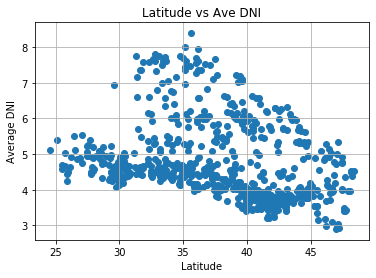

In [123]:
plt.scatter(combined_data["Lat"], combined_data["Ave DNI"])
plt.title('Latitude vs Ave DNI')
plt.xlabel('Latitude')
plt.ylabel('Average DNI')
plt.grid()
# plt.savefig('../output_data/Lat_vs_Ave_DNI.png')

## Latitude vs. Ave GHI Plot

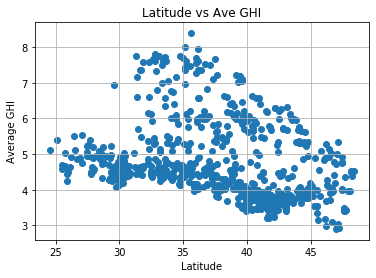

In [124]:
plt.scatter(combined_data["Lat"], combined_data["Ave GHI"])
plt.title('Latitude vs Ave GHI')
plt.xlabel('Latitude')
plt.ylabel('Average GHI')
plt.grid()

## Latitude vs. Ave Lat Tilt Plot

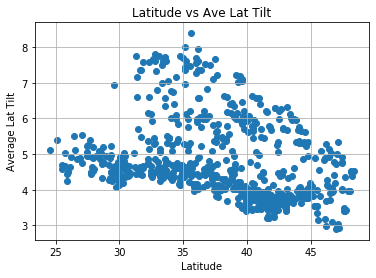

In [125]:
plt.scatter(combined_data["Lat"], combined_data["Ave Lat Tilt"])
plt.title('Latitude vs Ave Lat Tilt')
plt.xlabel('Latitude')
plt.ylabel('Average Lat Tilt')
plt.grid()

## Linear Regression

In [ ]:
# # OPTIONAL: Create a function to create Linear Regression plots
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=north[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Northern Latitudes vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()



In [ ]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# south=weather_data.loc[(weather_data['Lat']<=0)]
# xvalue=south['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=south[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Southern Latitudea vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()

In [ ]:
# # Create Northern and Southern Hemisphere DataFrames
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvaluen=north['Lat']
# south=weather_data.loc[(weather_data['Lat']<0)]
# xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# # plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# # yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# # north=weather_data.loc[(weather_data['Lat']>=0)]
# # xvalue=north['Lat']

    
# yvalue=north['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Northern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Max_Temp.png')
# plt.show()

# print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Southern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')
# plt.show()

# print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=north['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Northern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Southern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=north['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Northern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')
# plt.show()

# print('There is a slight decress in Cloudiness as you move North')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Southern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')
# plt.show()

# print('Slight incress in % Cloudiness as you move towards the equator')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# yvalue=north['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')
